In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import data_visualization as dv
wheel = dv.ColorWheel()
plt.style.use('cashaback_dark')
'''
DIFFERENT WAY IS THE BEST I GOT RIGHT NOW
'''
np.set_printoptions(suppress=True)

In [3]:
B = 0
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 40 # We have some uncertainty about making it 
movement_uncertainty = 20
reaction_uncertainty = 30
t = np.arange(0,1510,10)
prob_reacting_making = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty+100)
prob_making_gamble = stats.norm.cdf(1500-t,movement_time,movement_uncertainty+100)
cost_reacting = (1-prob_reacting_making)
cost_gamble = (1-prob_making_gamble) - B


In [4]:
gamble_reward = 0.5 # Expected reward of gambling is 1 * 0.5 (50 50 shot of guessing correctly)
react_reward = 1 # If someone reacts, it's assumed that they will automatically win
ER_r = react_reward - cost_reacting
ER_g = gamble_reward - cost_gamble

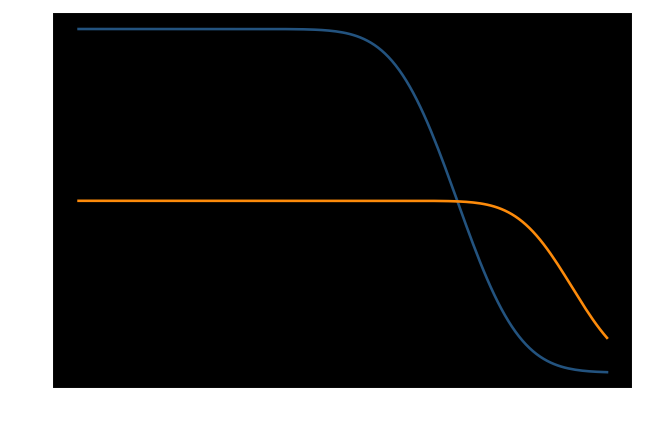

In [5]:
fig, ax = plt.subplots(dpi=125)
ax.plot(t,prob_reacting_making)
ax.plot(t,prob_making_gamble*0.5)


# Starting Simple

The problem is to max{0.5, 1.0*P($\alpha$ = 1|t)}, where $\alpha$ = 1 means the agent has gone.

- This is assuming people can respond instantly with no delay... what's the probability that the agent will go sometime before 1500

In [6]:
agent_mean, agent_std = 1200,200
prob_agent_goes = stats.norm.cdf(1500,agent_mean,agent_std)
prob_making_gamble = 1.0
prob_making_react = 1.0
exp_reward_react = 1.0 * prob_agent_goes * prob_making_react
exp_reward_gamble = 0.5 * prob_making_gamble

The problem comes when you won't be able to react 50% of the time... however, we can adjust our strategy online, waiting and catching the early agent trials while stopping well before the end

In [7]:
timesteps = np.arange(0,1500,10)
prob_event = np.zeros(len(timesteps))
i=-1
for t in timesteps:
    i+=1
    prob_event[i] = stats.norm.cdf(t,agent_mean,agent_std)
    

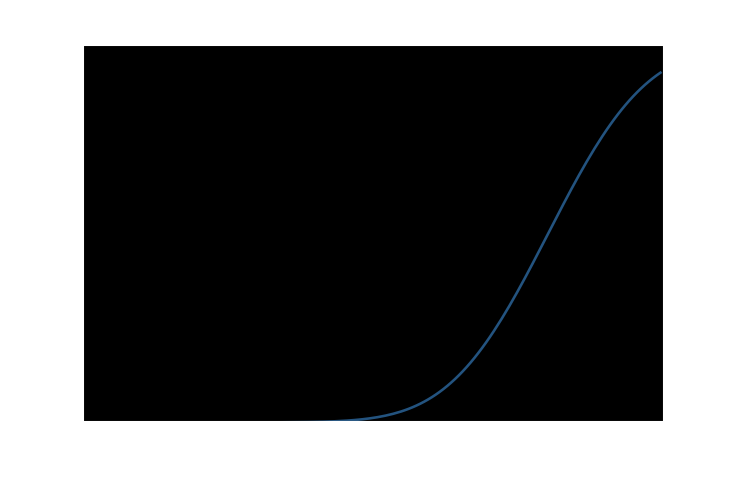

In [8]:
fig,ax = plt.subplots(dpi =125)
ax.plot(timesteps, prob_event)
ax.set_xlim(0,1500)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title('Probability of Agent Going at Each Time Point')
plt.show()

# Different way

Thinking about it in terms of the reward for each decision time selection, rather than the x-axis actually being time

This way is when there's no time constraint

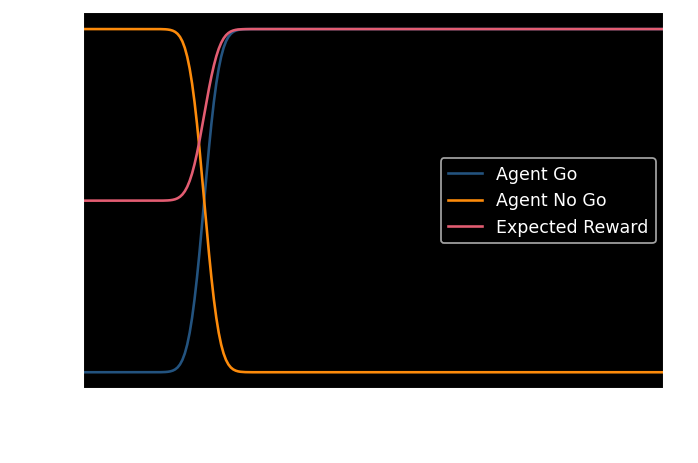

In [9]:
agent_mean,agent_std = 500,50
timesteps = np.arange(0,2500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
react_reward = 1.0
gamble_reward = 0.5
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    expected_reward[i] = gamble_reward*prob_agent_no_go[i] + react_reward*prob_agent_go[i]
    
fig,ax = plt.subplots(dpi =125)
ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
ax.plot(timesteps,expected_reward, label = 'Expected Reward')
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,2500,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend()
plt.show()

Now add in time constraint (aka multiply each piece of the expected reward by the probability of making it)

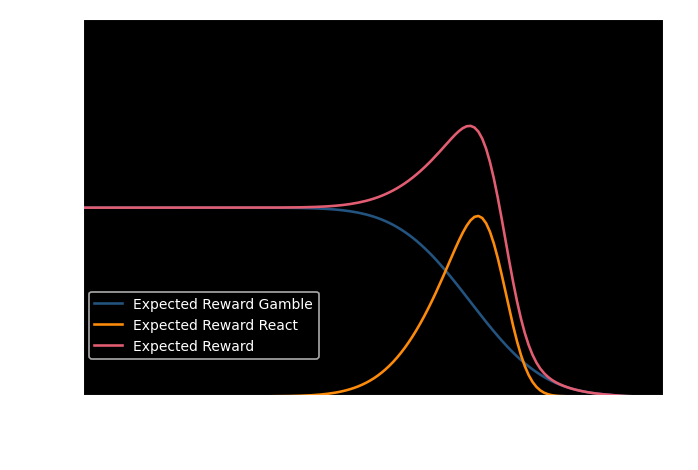

100


In [10]:
agent_mean,agent_std = 1000,150
timesteps = np.arange(0,1500,10)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_making_react = np.zeros(len(timesteps))
prob_making_gamble = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))
reaction_time = 325
movement_time = 100
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 50 # We have some uncertainty about making it 
movement_uncertainty = 20
react_reward = 1.0
gamble_reward = 0.5
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    expected_reward_gamble[i] = (gamble_reward*prob_agent_no_go[i])*prob_making_gamble[i]
    expected_reward_react[i] = (react_reward*prob_agent_go[i])*prob_making_react[i]*B
    expected_reward[i] = expected_reward_gamble[i] + expected_reward_react[i]
    
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
# ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
# ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
ax.plot(timesteps,expected_reward_gamble, label = 'Expected Reward Gamble')
ax.plot(timesteps,expected_reward_react, label = 'Expected Reward React')
ax.plot(timesteps,expected_reward, label = 'Expected Reward')

ax.set_ylim(0,1)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
plt.show()

print(np.argmax(expected_reward))

This is the expected reward for a certain decision time

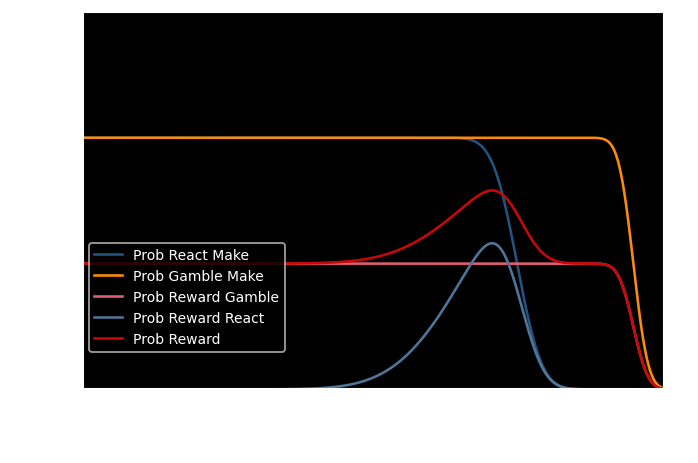

1056


In [82]:
agent_mean,agent_std = 1000,150
timesteps = np.arange(0,1500,1)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_making_react = np.zeros(len(timesteps))
prob_making_gamble = np.zeros(len(timesteps))
expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))
prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))
reaction_time = 300
movement_time = 80
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 50 # We have some uncertainty about making it 
movement_uncertainty = 30

prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 2.0
loss_cost = 0.0
indecision_cost = 0
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    prob_reward_gamble[i] = (prob_success_gamble)*prob_making_gamble[i] 
    prob_reward_react[i] = (prob_success_react*prob_agent_go[i])*prob_making_react[i] 
    prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
    
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
ax.plot(timesteps,prob_reward_gamble, label = 'Prob Reward Gamble')
ax.plot(timesteps,prob_reward_react, label = 'Prob Reward React')
ax.plot(timesteps,prob_reward, label = 'Prob Reward')

ax.set_ylim(0,1.5)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,1600,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
plt.show()

print(np.argmax(prob_reward))

### Best Gain Function Equations

- Decision time and target reach time....
- Using B to determine the tendency of reacting or gambling 
    - This mainly sets the probability that someone will make an indecision if the agent hasn't gone after some time 
    - B = 0 means they have a tendency to gamble, B = 1 means they have a tendency to react
    - This only affects the indecision probability right now, but maybe I can tack it onto the probability of gamble reward and react reward? (probabaly not, these shouldn't depend on tendencies, they are just the gain function.... people's tendencies determine when they select a decision time)

Decision Time

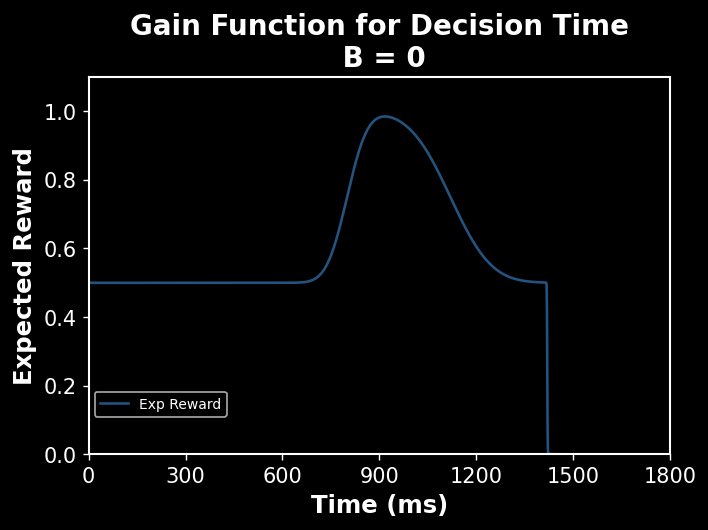

Optimal Decision Time: 917
Gamble Target Reach Time: 997
Reaction Target Reach Time: 1297


In [173]:
# Don't quite have the B working yet, but it's nice to have on the indecision probability
B_list = [0] #[0,0.5,1] # B is the likelihood that someone will gamble or react. B = 1 means they are very likely to react, B = 0 means they are very likely to gamble
for B in B_list:
    agent_mean,agent_std = 800,50
    timesteps = np.arange(0,2000,1)
    prob_agent_go = np.zeros(len(timesteps))
    prob_agent_no_go = np.zeros(len(timesteps))
    prob_making_react = np.zeros(len(timesteps))
    prob_making_gamble = np.zeros(len(timesteps))

    expected_reward = np.zeros(len(timesteps))
    expected_reward_gamble = np.zeros(len(timesteps))
    expected_reward_react = np.zeros(len(timesteps))
    prob_reward_gamble = np.zeros(len(timesteps))
    prob_reward_react = np.zeros(len(timesteps))
    prob_reward = np.zeros(len(timesteps))
    reaction_time = 300
    movement_time = 80
    reaction_movement_time = reaction_time + movement_time
    reaction_movement_uncertainty = 100 # We have some uncertainty about making it 
    movement_uncertainty = 1

    prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
    prob_success_react = 1.0
    win_reward = 1.0
    loss_cost =0
    indecision_cost = 0
    i=-1
    for t in timesteps:
        i+=1
        prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
        prob_agent_no_go[i] = 1 - prob_agent_go[i]
        prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
        prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
        
    prob_reward_gamble = (prob_success_gamble)*prob_making_gamble
    prob_cost_gamble = (1-prob_success_gamble)*prob_making_gamble # Probability of receiving the Cost for being incorrect
    
    prob_reward_react = (prob_success_react*prob_agent_go)*prob_making_react 
    prob_cost_react = ((1-prob_success_react)*prob_agent_go)*prob_making_react # Probability of receiving the Cost for being incorrect
    
    prob_indecision_gamble = (1 - prob_making_gamble)
    prob_indecision_react = (1 - prob_making_react)    
    
    
    prob_reward = prob_reward_gamble + prob_reward_react - (prob_reward_gamble*prob_reward_react) # NEED TO SUBTRACT THE AND PROBABILITY?... this makes sense... If I go at that time, I at least have 0.5 PLUS the probability that the agent has gone will boost it up
    prob_cost = prob_cost_gamble + prob_cost_react  - (prob_cost_react*prob_cost_gamble)
    prob_indecision = prob_indecision_gamble + prob_indecision_react - (prob_indecision_gamble*prob_indecision_react) # Probability of indecision depends on if someone gambles
    
    #prob_indecision = prob_indecision_gamble*(1-B) + prob_indecision_react*B - prob_indecision_gamble*(1-B)*B*prob_indecision_react # Probability of indecision depends on if someone gambles 
    
    exp_reward_gamble = prob_reward_gamble*win_reward + prob_cost_gamble*loss_cost + prob_indecision_gamble*indecision_cost
    exp_reward_react = prob_reward_react*win_reward + prob_cost_react*loss_cost + prob_indecision_gamble*indecision_cost
    exp_reward = prob_reward*win_reward + prob_cost*loss_cost + (prob_indecision_gamble)*indecision_cost
            
    fig,ax = plt.subplots(dpi = 125)
    # ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
    # ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
    # ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
    # ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
    # ax.plot(timesteps,prob_reward_gamble, label = 'Prob Reward Gamble')
    # ax.plot(timesteps,prob_reward_react, label = 'Prob Reward React')
    #ax.plot(timesteps,prob_reward, label = 'Probability of Reward')
    # ax.plot(timesteps, exp_reward_gamble, label = 'ER Gamble')
    # ax.plot(timesteps, exp_reward_react, label = 'ER React')
    # ax.plot(timesteps,exp_reward, label = 'Expected Reward', c= wheel.red)
    # ax.plot(timesteps, prob_indecision_gamble, label = 'Prob Indecision Gamble')
    # ax.plot(timesteps, prob_indecision_react, label = 'Prob Indecision React')
    # ax.plot(timesteps, prob_indecision, label = 'Prob Indecision', c = wheel.purple, ls = '--')
    # ax.plot(timesteps, prob_cost, label = 'Prob Cost')
    # ax.plot(timesteps, prob_indecision, label = 'Prob Indecision')
    ax.plot(timesteps, exp_reward, label = 'Exp Reward')
    # ax.plot(timesteps, prob_reward, label = 'Prob Reward', c = wheel.green, ls = '--')
    # ax.plot(timesteps, prob_indecision_gamble )


    ax.set_ylim(0,1.1)
    ax.set_xlim(0,1500)
    ax.set_xticks(np.arange(0,2000,300))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.legend(fontsize = 8,loc = (0.01,0.1))
    ax.set_title(f'Gain Function for Decision Time\n B = {B}')
    plt.show()
    optimal_decision_time  = np.argmax(prob_reward) 
    target_reach_time_on_gambles = optimal_decision_time + movement_time 
    target_reach_time_on_reactions = optimal_decision_time + reaction_movement_time
    print(f'Optimal Decision Time: {optimal_decision_time}') # Remember the task decision time is this 
    print(f'Gamble Target Reach Time: {target_reach_time_on_gambles}')
    print(f'Reaction Target Reach Time: {target_reach_time_on_reactions}')

In [91]:
percent_indecisions = 1 - stats.norm.cdf(1500,target_reach_time_on_reactions,70)
percent_indecisions

0.7161454169013237

Expected Reward for reach time
- Needed to adjust the timesteps when indexing
- Note the if statements have changed from probabiilty of making it for a certain decision time (from last cell) to the probability that I reach the target when reacting
- Also had to subtract movement time and reaction time from the prob_agent_go, because you only get to use the agent if the agent went before you moved 

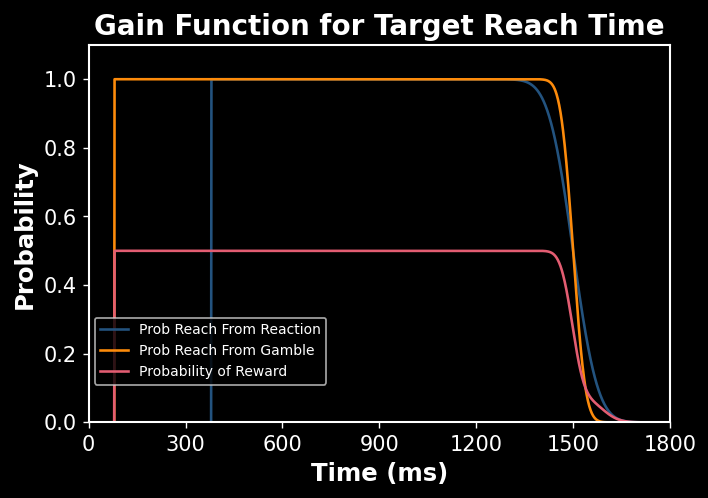

1371


In [159]:
agent_mean,agent_std = 1200,50
timesteps = np.arange(0,2000,1)

prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_making_react = np.zeros(len(timesteps))
prob_making_gamble = np.zeros(len(timesteps))
prob_reached_from_reaction = np.zeros(len(timesteps))
prob_reached_from_gamble = np.zeros(len(timesteps))

expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))

prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))

reaction_time = 300
movement_time = 80
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 60 # We have some uncertainty about making it 
movement_uncertainty = 30

prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 2.0
loss_cost = 0.0
indecision_cost = 0
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    
    if t <= np.max(timesteps) - (reaction_time + movement_time):
        prob_reached_from_reaction[i+reaction_time+movement_time] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    if t <= np.max(timesteps) - movement_time:
        prob_reached_from_gamble[i+movement_time] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    # prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    # prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    prob_reward_gamble[i] = (prob_success_gamble)*prob_reached_from_gamble[i] 
    prob_reward_react[i] = (prob_success_react*prob_agent_go[i-reaction_time-movement_time])*prob_reached_from_reaction[i] 
    prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
    
        
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
# ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
# ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
ax.plot(timesteps,prob_reached_from_reaction, label = 'Prob Reach From Reaction')
ax.plot(timesteps,prob_reached_from_gamble, label = 'Prob Reach From Gamble')
ax.plot(timesteps,prob_reward, label = 'Probability of Reward')

ax.set_ylim(0,1.1)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,2000,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
ax.set_title('Gain Function for Target Reach Time')
plt.show()

optimal_target_reach_time = np.argmax(prob_reward)
print(optimal_target_reach_time)

Get actual target reach time distribution based on timing uncertainty and calculate indecisions

In [17]:
percent_indecisions = 1- stats.norm.cdf(1500,optimal_target_reach_time,100)
percent_indecisions

0.20897008787160165

### Calculate Percent Wins, Percent Indecisions for each agent mean and std

Find optimal decision time function

In [189]:
def find_optimal_decision_time(agent_mean, agent_std, reaction_time,movement_time, reaction_movement_uncertainty, movement_uncertainty,plot=False):
    timesteps = np.arange(0,2000,1)
    prob_agent_go = np.zeros(len(timesteps))
    prob_agent_no_go = np.zeros(len(timesteps))
    prob_making_react = np.zeros(len(timesteps))
    prob_making_gamble = np.zeros(len(timesteps))

    expected_reward = np.zeros(len(timesteps))
    expected_reward_gamble = np.zeros(len(timesteps))
    expected_reward_react = np.zeros(len(timesteps))
    prob_reward_gamble = np.zeros(len(timesteps))
    prob_reward_react = np.zeros(len(timesteps))
    prob_reward = np.zeros(len(timesteps))
    reaction_movement_time = reaction_time + movement_time

    prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
    prob_success_react = 1.0
    win_reward = 1.0
    loss_cost = 0
    indecision_cost = 0
    i=-1
    for t in timesteps:
        i+=1
        prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
        prob_agent_no_go[i] = 1 - prob_agent_go[i]
        prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
        prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
        
    prob_reward_gamble = (prob_success_gamble)*prob_making_gamble
    prob_cost_gamble = (1-prob_success_gamble)*prob_making_gamble # Probability of receiving the Cost for being incorrect
    
    prob_reward_react = (prob_success_react*prob_agent_go)*prob_making_react 
    prob_cost_react = ((1-prob_success_react)*prob_agent_go)*prob_making_react # Probability of receiving the Cost for being incorrect
    
    prob_indecision_gamble = (1 - prob_making_gamble)
    prob_indecision_react = (1 - prob_making_react)    
    
    
    prob_reward = prob_reward_gamble + prob_reward_react- (prob_reward_gamble*prob_reward_react) # NEED TO SUBTRACT THE AND PROBABILITY?... this makes sense... If I go at that time, I at least have 0.5 PLUS the probability that the agent has gone will boost it up
    prob_cost = prob_cost_gamble + prob_cost_react - (prob_cost_react*prob_cost_gamble)
    prob_indecision = prob_indecision_gamble + prob_indecision_react - (prob_indecision_gamble*prob_indecision_react) # Probability of indecision depends on if someone gambles
    
    #prob_indecision = prob_indecision_gamble*(1-B) + prob_indecision_react*B - prob_indecision_gamble*(1-B)*B*prob_indecision_react # Probability of indecision depends on if someone gambles 
    
    exp_reward_gamble = prob_reward_gamble*win_reward + prob_cost_gamble*loss_cost + prob_indecision_gamble*indecision_cost
    exp_reward_react = prob_reward_react*win_reward + prob_cost_react*loss_cost + prob_indecision_gamble*indecision_cost
    exp_reward = prob_reward*win_reward + prob_cost*loss_cost + (prob_indecision_gamble)*indecision_cost
    
    if plot:
        fig,ax = plt.subplots(dpi = 125)
        # ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
        # ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
        # ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
        # ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
        # ax.plot(timesteps,prob_reward_gamble, label = 'Prob Reward Gamble')
        # ax.plot(timesteps,prob_reward_react, label = 'Prob Reward React')
        #ax.plot(timesteps,prob_reward, label = 'Probability of Reward')
        # ax.plot(timesteps, exp_reward_gamble, label = 'ER Gamble')
        # ax.plot(timesteps, exp_reward_react, label = 'ER React')
        # ax.plot(timesteps,exp_reward, label = 'Expected Reward', c= wheel.red)
        # ax.plot(timesteps, prob_indecision_gamble, label = 'Prob Indecision Gamble')
        # ax.plot(timesteps, prob_indecision_react, label = 'Prob Indecision React')
        # ax.plot(timesteps, prob_indecision, label = 'Prob Indecision', c = wheel.purple, ls = '--')
        ax.plot(timesteps, prob_cost*-1, label = 'Prob Cost')
        ax.plot(timesteps, prob_indecision, label = 'Prob Indecision')
        ax.plot(timesteps, exp_reward, label = 'Exp Reward')
        ax.plot(timesteps, prob_reward, label = 'Prob Reward', c = wheel.green, ls = '--')
        # ax.plot(timesteps, prob_indecision_gamble )
        print(prob_cost)

        ax.set_ylim(-1,1.1)
        ax.set_xlim(0,1500)
        ax.set_xticks(np.arange(0,2000,300))
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Expected Reward')
        ax.legend(fontsize = 8,loc = (0.01,0.1))
        ax.set_title(f'Gain Function for Decision Time\n B = {B}')
        plt.show()
        optimal_decision_time  = np.argmax(prob_reward) 
        target_reach_time_on_gambles = optimal_decision_time + movement_time 
        target_reach_time_on_reactions = optimal_decision_time + reaction_movement_time
        print(f'Optimal Decision Time: {optimal_decision_time}') # Remember the task decision time is this 
        print(f'Gamble Target Reach Time: {target_reach_time_on_gambles}')
        print(f'Reaction Target Reach Time: {target_reach_time_on_reactions}')
        
    return np.argmax(prob_reward),np.max(prob_reward)

##### Find optimal target reach time function 

In [193]:
def find_optimal_reach_time(agent_mean,agent_std,reaction_time,movement_time,reaction_movement_uncertainty,movement_uncertainty,plot=False):
    timesteps = np.arange(0,2000,1)

    prob_agent_go = np.zeros(len(timesteps))
    prob_agent_no_go = np.zeros(len(timesteps))
    prob_making_react = np.zeros(len(timesteps))
    prob_making_gamble = np.zeros(len(timesteps))
    prob_reached_from_reaction = np.zeros(len(timesteps))
    prob_reached_from_gamble = np.zeros(len(timesteps))

    expected_reward = np.zeros(len(timesteps))
    expected_reward_gamble = np.zeros(len(timesteps))
    expected_reward_react = np.zeros(len(timesteps))
    prob_reward_gamble = np.zeros(len(timesteps))
    prob_reward_react = np.zeros(len(timesteps))
    prob_reward = np.zeros(len(timesteps))
    
    reaction_movement_time = reaction_time + movement_time
    prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
    prob_success_react = 1.0
    win_reward = 2.0
    loss_cost = 0.0
    indecision_cost = 0
    B = 1
    i=-1
    for t in timesteps:
        i+=1
        prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
        prob_agent_no_go[i] = 1 - prob_agent_go[i]
        
        if t <= np.max(timesteps) - (reaction_time + movement_time):
            prob_reached_from_reaction[i+reaction_time+movement_time] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
        if t <= np.max(timesteps) - movement_time:
            prob_reached_from_gamble[i+movement_time] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
        
        # prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
        # prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
        
        prob_reward_gamble[i] = (prob_success_gamble)*prob_reached_from_gamble[i] 
        prob_reward_react[i] = (prob_success_react*prob_agent_go[i-reaction_time-movement_time])*prob_reached_from_reaction[i] 
        prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
        
    if plot:
        fig,ax = plt.subplots(dpi = 125)
        # ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
        # ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
        # ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
        # ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
        ax.plot(timesteps,prob_reached_from_reaction, label = 'Prob Reach From Reaction')
        ax.plot(timesteps,prob_reached_from_gamble, label = 'Prob Reach From Gamble')
        ax.plot(timesteps,prob_reward, label = 'Probability of Reward')

        ax.set_ylim(0,1.1)
        ax.set_xlim(0,1500)
        ax.set_xticks(np.arange(0,2000,300))
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Probability')
        ax.legend(fontsize = 8,loc = (0.01,0.1))
        ax.set_title('Gain Function for Target Reach Time')
        plt.show()

        optimal_target_reach_time = np.argmax(prob_reward)
        print(optimal_target_reach_time)

    optimal_target_reach_time = np.argmax(prob_reward)
    return optimal_target_reach_time,np.max(prob_reward)

In [194]:
# Checking out 1200, the optimal just isn't right

#### Plot Expected Reward Over Time

[0.5 0.5 0.5 ... 0.  0.  0. ]


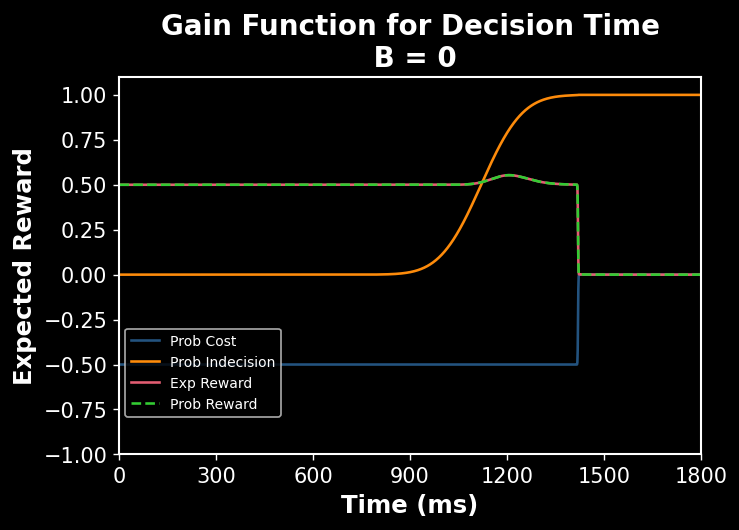

Optimal Decision Time: 1207
Gamble Target Reach Time: 1287
Reaction Target Reach Time: 1587
1207 0.5533860518632084


In [196]:
x,y = find_optimal_decision_time(1200, 50, reaction_time, movement_time, reaction_movement_uncertainty, movement_uncertainty,plot=True)
print(x,y)

#### Calculate optimals

In [162]:
agent_means = np.array([1000,1000,1100,1100,1200,1200])
agent_stds = np.array([50,150,50,150,50,150])
reaction_time = 300
movement_time = 80
reaction_movement_uncertainty = 60 # We have some uncertainty about making it 
movement_uncertainty = 30

optimal_decision_times = np.zeros(len(agent_means))
optimal_reach_times = np.zeros(len(agent_means))
i=-1
for mean,std in zip(agent_means,agent_stds):
    i+=1
    optimal_decision_times[i] = find_optimal_decision_time(mean, std, reaction_time, movement_time, reaction_movement_uncertainty, movement_uncertainty,plot=False)
    optimal_reach_times[i] = find_optimal_reach_time(mean,std,reaction_time,movement_time,reaction_movement_uncertainty,movement_uncertainty,plot = False)
    
print(optimal_decision_times)
print(optimal_reach_times)

[1058. 1051. 1115. 1072. 1172. 1092.]
[1436. 1427. 1460. 1434. 1371. 1432.]


#### Calculate number of indecisions and wins based on timing uncertainty 

In [152]:
optimal_reach_times - optimal_decision_times

array([378., 376., 345., 362., 199., 340.])

We have 
1. Reach Time on gambles and reactions
2. The probability of reacting and gambling
  - If the agent goes before my decision time, that is a reaction
  - If the agent goes after my decision time, that is a gamble
  - We calculate the prob of that happening based on the optimal decision time and the agent means stds
3. Then we have the probability of an indecision IF i react and IF I gamble
  - This is the probability of my reach time on a reaction being greater than 1500 (react_reach_time = decision_time + reaction_time + movement_time)
  - Also prob of my reach time on a gamble being greater than 1500 (gamble_reach_time = decision_time + movement_time)
4. Total probability of indecision is
  - Probability of reacting multiplied by prob of indecision if I react + prob of gambling multiplied by prob of indecision

In [171]:
# Establish reach times
reach_time_gamble = optimal_decision_times + movement_time
reach_time_reaction = optimal_decision_times + reaction_movement_time

# Calculate difference of distributions
mean_diff = optimal_decision_times - agent_means
std_diff = np.sqrt(reaction_movement_uncertainty**2 + agent_stds**2) 
prob_react = 1 - stats.norm.cdf(0, mean_diff,std_diff) # Probability that optimal decision time is after the agent goes (aka we react)  NEEDED TO DO THE TWO DISTRIBUTION DIFFERENCE THING
prob_gamble = 1 - prob_react

prob_indecision_if_react = 1 - stats.norm.cdf(1500,reach_time_reaction,reaction_movement_uncertainty) # Probability that the reach time reaction is > 1500 
prob_indecision_if_gamble = 1 - stats.norm.cdf(1500,reach_time_gamble,movement_uncertainty)
prob_indecision = prob_react*prob_indecision_if_react + prob_gamble*prob_indecision_if_gamble


prob_win_if_react = (1-prob_indecision_if_react)*1.0 # prob win if react is the probability that I don't make a decision times the probability that i select the right target (1.0)
prob_win_if_gamble = (1-prob_indecision_if_gamble)*0.5 # prob win if gamble is the probability that I don't make a decision times the probabiliyt that I select the right target(0.5)


prob_incorrect_if_react = 0
prob_incorrect_if_gamble = (1-prob_indecision_if_gamble)*0.5

prob_win = prob_react*prob_win_if_react + prob_gamble*prob_win_if_gamble

prob_incorrect = prob_react*prob_incorrect_if_react + prob_gamble*prob_incorrect_if_gamble
print(f'Agent means = {agent_means}')
print(f'Agent Stds = {agent_stds}')
print(f'Prob indecision = {prob_indecision*100}')
print(f'Prob win =        {prob_win*100}')
print(f'Prob incorrect =  {prob_incorrect*100}')
print(prob_indecision + prob_win + prob_incorrect)

Agent means = [1000 1000 1100 1100 1200 1200]
Agent Stds = [ 50 150  50 150  50 150]
Prob indecision = [18.68153121 14.9845535  26.56483834 13.83290897 28.01721531 10.70070741]
Prob win =        [66.2204014  65.58405356 51.10334091 58.08139501 42.03896965 53.02734419]
Prob incorrect =  [15.09806739 19.43139294 22.33182075 28.08569602 29.94381504 36.2719484 ]
[1. 1. 1. 1. 1. 1.]


In [141]:
prob_gamble*prob_win_if_gamble

array([0.11442887, 0.12844099, 0.21192472, 0.32000832, 0.32000832,
       0.45831832])

In [113]:
i = 4
print(optimal_decision_times[i])
print(reach_time_reaction[i])
print(prob_react[i])
print(prob_indecision_if_react[i])
print(prob_indecision_if_react[i]*prob_react[i])

1172.0
1552.0
0.35998336290966226
0.8069376628580931
0.2904841335341196


In [107]:
reach_time_reaction[i]

1472.0

In [77]:
agent_means

array([1000, 1000, 1100, 1100, 1200, 1200])

In [78]:
prob_react

array([0.79396145, 0.76462181, 0.58399799, 0.34605997, 0.34605997,
       0.06333692])

In [30]:
print(f'Indecisions: {1 - stats.norm.cdf(1500,optimal_decision_times+movement_time+reaction_time,reaction_movement_uncertainty)}')

print(f'Wins:        {1 - stats.norm.cdf(0,optimal_decision_times - agent_means,np.sqrt(agent_stds**2 + reaction_movement_uncertainty**2))}')

Indecisions: [0.15072397 0.12507194 0.46679325 0.2118554  0.80693766 0.32036919]
Wins:        [0.77114227 0.62387808 0.57615056 0.43120166 0.35998336 0.25190621]


In [23]:
#%% Calculating analytical probability
def calculate_prob_wins_indecisions_using_reach_times(reaction_time, player_reach_mean, player_sd, agent_reach_mean, agent_sd):
    # Standard deviation 
    sig1,sig2 = player_sd,agent_sd # Sig 1 is player, sig 2 is agent
    var1,var2 = sig1**2,sig2**2
    var_diff = sig1**2 + sig2**2
    sig_diff = np.sqrt(var_diff)
    
    # Expected value multipliers 
    P_100, P_50, P_0 = 1,0.5,0
    reach_mean_diff = player_reach_mean - agent_reach_mean
    # Probabilites 
    player_less_1500 = stats.norm.cdf(1500,player_reach_mean,sig1)
    player_greater_1500 = 1 - player_less_1500
    agent_less_1500 = stats.norm.cdf(1500,agent_reach_mean,sig2)
    agent_greater_1500 = 1 - agent_less_1500
    diff_less_reaction = stats.norm.cdf(reaction_time,reach_mean_diff,sig_diff)
    diff_greater_reaction = 1 - diff_less_reaction

    player_random_win = diff_less_reaction*player_less_1500*agent_less_1500*P_50
    player_sensory_evidence_win = diff_greater_reaction*P_100*player_less_1500*agent_less_1500*P_100
    player_win_from_opp_indecision = player_less_1500*agent_greater_1500*P_100
    player_indecision = player_greater_1500

    player_win_rate = player_random_win + player_sensory_evidence_win + player_win_from_opp_indecision
    print(player_reach_mean,player_greater_1500,stats.norm.cdf(1500,player_reach_mean,sig1))

    return player_win_rate,player_indecision

In [24]:
p1_win_rates = np.zeros(len(optimal_reach_times))
p1_indecision_rates = np.zeros(len(optimal_reach_times))
decision_timing_uncertainty = 50
agent_reach_means = np.array(agent_means) + 150
for i in range(len(optimal_reach_times)):
    p1_win_rates[i],p1_indecision_rates[i] = calculate_prob_wins_indecisions_using_reach_times(reaction_time,optimal_reach_times[i], decision_timing_uncertainty, agent_reach_means[i], agent_stds[i])
print(f'P1 Win Rates: {p1_win_rates}')
print(f'P1 Indecisions Rates: {p1_indecision_rates}')

1436.0 0.10027256795444206 0.8997274320455579
1427.0 0.0721450369658938 0.9278549630341062
1460.0 0.21185539858339664 0.7881446014166034
1434.0 0.09341750899347179 0.9065824910065282
1371.0 0.004940015757770699 0.9950599842422293
1432.0 0.08691496194708503 0.913085038052915
P1 Win Rates: [0.63949319 0.67160333 0.43408883 0.57491133 0.49822138 0.56123501]
P1 Indecisions Rates: [0.10027257 0.07214504 0.2118554  0.09341751 0.00494002 0.08691496]


In [25]:
#%% Calculating analytical probability
def calculate_prob_wins_indecisions_using_decision_time(reaction_time, movement_time, player_decision_means, player_sd, agent_decision_means,agent_sd):
    # Standard deviation 
    sig1,sig2 = player_sd,agent_sd # Sig 1 is player, sig 2 is agent
    var_diff = sig1**2 + sig2**2
    sig_diff = np.sqrt(var_diff)
    agent_movement_time = 150
    # Expected value multipliers 
    P_100, P_50, P_0 = 1,0.5,0
    decision_means_diff = player_decision_means - agent_decision_means
    # Probabilites 
    p1_less_1500 = stats.norm.cdf(1500,player_decision_means+movement_time+reaction_time,sig1)
    p1_greater_1500 = 1 - p1_less_1500
    p2_less_1500 = stats.norm.cdf(1500, agent_decision_means+agent_movement_time,sig2)
    p2_greater_1500 = 1 - p2_less_1500
    diff_less_reaction = stats.norm.cdf(0,decision_means_diff,sig_diff)
    diff_greater_reaction = 1 - diff_less_reaction
    
    p1_random_win = diff_less_reaction*p1_less_1500*p2_less_1500*P_50
    p1_sensory_evidence_win = diff_greater_reaction*P_100*p1_less_1500*p2_less_1500*P_100
    p1_win_from_opp_indecision = p1_less_1500*p2_greater_1500*P_100
    p1_indecision = p1_greater_1500
    
    
    p1_win_rate = p1_random_win + p1_sensory_evidence_win + p1_win_from_opp_indecision
    return p1_win_rate,p1_indecision

In [26]:
agent_means

array([1000, 1000, 1100, 1100, 1200, 1200])

In [27]:
p1_win_rates = np.zeros(len(optimal_decision_times))
p1_indecision_rates = np.zeros(len(optimal_decision_times))
decision_timing_uncertainty = 50
for i in range(len(optimal_decision_times)):
    p1_win_rates[i],p1_indecision_rates[i] = calculate_prob_wins_indecisions_using_decision_time(reaction_time,movement_time,optimal_decision_times[i],decision_timing_uncertainty,agent_means[i],agent_stds[i])
print(f'P1 Win Rates: {p1_win_rates}')
print(f'P1 Indecisions Rates: {p1_indecision_rates}')



P1 Win Rates: [0.80056633 0.74677672 0.42754314 0.6057167  0.10046169 0.48672622]
P1 Indecisions Rates: [0.1074877  0.08379332 0.46017216 0.16852761 0.85083005 0.28773972]


I have a nice framework, now I need to do this optimal stopping style where I make a decision at every time step 
- Maybe multiply the expected reward function at each time step by the probability that I will actually select time T given i choose time U
- Also need to somehow compare the reward of waiting one more timestep and the reward of going now
   - This is likely a different way of thinking than the expected gain function I had from before

In [28]:
expected_reward_gamble

array([0., 0., 0., ..., 0., 0., 0.])